2023-11-28 21:05:16,503	INFO util.py:159 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2023-11-28 21:05:16,630	INFO util.py:159 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


X_train shape: (78, 256)
X_test shape: (20, 256)
y_train shape: 78
y_test shape: 20


2023-11-28 21:05:19,389	INFO worker.py:1673 -- Started a local Ray instance.
2023-11-28 21:05:20,679	INFO tune.py:220 -- Initializing Ray automatically. For cluster usage or custom Ray initialization, call `ray.init(...)` before `tune.run(...)`.
2023-11-28 21:05:20,681	INFO tune.py:586 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949


Trial name,mean_squared_error
lambda_bfd86_00000,158.922


2023-11-28 21:05:26,642	INFO tune.py:1047 -- Total run time: 5.96 seconds (5.92 seconds for the tuning loop).
2023-11-28 21:05:26,796	INFO tune.py:586 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949


(<lambda> pid=32464) Average MSE: 158.92156982421875 +/- 149.83544921875
X_train shape: (78, 256)
X_test shape: (20, 256)
y_train shape: 78
y_test shape: 20


Trial name,mean_squared_error
lambda_c37d7_00000,186.309


2023-11-28 21:05:32,035	INFO tune.py:1047 -- Total run time: 5.24 seconds (5.22 seconds for the tuning loop).
2023-11-28 21:05:32,127	INFO tune.py:586 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949


X_train shape: (78, 256)
X_test shape: (20, 256)
y_train shape: 78
y_test shape: 20


Trial name,mean_squared_error
lambda_c6aaf_00000,208.54


2023-11-28 21:05:37,731	INFO tune.py:1047 -- Total run time: 5.60 seconds (5.59 seconds for the tuning loop).
2023-11-28 21:05:37,902	INFO tune.py:586 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949


(<lambda> pid=29504) Average MSE: 208.53955078125 +/- 135.83828735351562
X_train shape: (78, 256)
X_test shape: (20, 256)
y_train shape: 78
y_test shape: 20


Trial name,mean_squared_error
lambda_ca1c3_00000,218.877


2023-11-28 21:05:45,666	INFO tune.py:1047 -- Total run time: 7.76 seconds (7.74 seconds for the tuning loop).


(<lambda> pid=23228) Average MSE: 218.8774871826172 +/- 155.33091735839844


2023-11-28 21:05:46,131	INFO tune.py:586 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949


X_train shape: (78, 256)
X_test shape: (20, 256)
y_train shape: 78
y_test shape: 20


Trial name,mean_squared_error
lambda_cf03d_00000,153.765


2023-11-28 21:05:51,924	INFO tune.py:1047 -- Total run time: 5.79 seconds (5.77 seconds for the tuning loop).
2023-11-28 21:05:52,123	INFO tune.py:586 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949


(<lambda> pid=17360) Average MSE: 153.7646026611328 +/- 151.09181213378906
X_train shape: (78, 256)
X_test shape: (20, 256)
y_train shape: 78
y_test shape: 20


Trial name,mean_squared_error
lambda_d2962_00000,314.588


2023-11-28 21:05:57,582	INFO tune.py:1047 -- Total run time: 5.46 seconds (5.44 seconds for the tuning loop).
2023-11-28 21:05:57,744	INFO tune.py:586 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949


(<lambda> pid=26868) Average MSE: 314.588134765625 +/- 274.2331848144531
X_train shape: (78, 256)
X_test shape: (20, 256)
y_train shape: 78
y_test shape: 20


Trial name,mean_squared_error
lambda_d5efd_00000,229.611


2023-11-28 21:06:04,515	INFO tune.py:1047 -- Total run time: 6.77 seconds (6.75 seconds for the tuning loop).


(<lambda> pid=28988) Average MSE: 229.6111602783203 +/- 230.64698791503906


2023-11-28 21:06:04,865	INFO tune.py:586 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949


X_train shape: (78, 256)
X_test shape: (20, 256)
y_train shape: 78
y_test shape: 20


Trial name,mean_squared_error
lambda_da2e5_00000,204.688


2023-11-28 21:06:09,779	INFO tune.py:1047 -- Total run time: 4.91 seconds (4.90 seconds for the tuning loop).
2023-11-28 21:06:09,848	INFO tune.py:586 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949


(<lambda> pid=3196) Average MSE: 204.68844604492188 +/- 186.69854736328125
X_train shape: (78, 256)
X_test shape: (20, 256)
y_train shape: 78
y_test shape: 20


Trial name,mean_squared_error
lambda_dd26b_00000,170.069


2023-11-28 21:06:15,866	INFO tune.py:1047 -- Total run time: 6.02 seconds (6.00 seconds for the tuning loop).
2023-11-28 21:06:16,128	INFO tune.py:586 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949


(<lambda> pid=14768) Average MSE: 170.06948852539062 +/- 144.20233154296875
X_train shape: (78, 256)
X_test shape: (20, 256)
y_train shape: 78
y_test shape: 20


Trial name,mean_squared_error
lambda_e0e52_00000,261.703


2023-11-28 21:06:22,338	INFO tune.py:1047 -- Total run time: 6.21 seconds (6.19 seconds for the tuning loop).
2023-11-28 21:06:22,635	INFO tune.py:586 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949


Selected feature: eccentricity, Iteration best MSE: 24.569665908813477, Iteration Best Config: {'model_type': 'xgb_regressor', 'n_estimators': 500, 'learning_rate': 0.005, 'max_depth': 5, 'subsample': 0.8, 'colsample_bytree': 0.6}
X_train shape: (78, 512)
X_test shape: (20, 512)
y_train shape: 78
y_test shape: 20


Trial name,mean_squared_error
lambda_e4c5e_00000,361.538


2023-11-28 21:06:28,196	INFO tune.py:1047 -- Total run time: 5.56 seconds (5.54 seconds for the tuning loop).
2023-11-28 21:06:28,357	INFO tune.py:586 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949


(<lambda> pid=5788) Average MSE: 361.5376892089844 +/- 384.3821716308594
X_train shape: (78, 512)
X_test shape: (20, 512)
y_train shape: 78
y_test shape: 20


Trial name,mean_squared_error
lambda_e82f3_00000,209.966


2023-11-28 21:06:33,498	INFO tune.py:1047 -- Total run time: 5.14 seconds (5.12 seconds for the tuning loop).
2023-11-28 21:06:33,580	INFO tune.py:586 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949


X_train shape: (78, 512)
X_test shape: (20, 512)
y_train shape: 78
y_test shape: 20


Trial name,mean_squared_error
lambda_eb4c4_00000,168.803


2023-11-28 21:06:39,328	INFO tune.py:1047 -- Total run time: 5.75 seconds (5.73 seconds for the tuning loop).
2023-11-28 21:06:39,488	INFO tune.py:586 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949


X_train shape: (78, 512)
X_test shape: (20, 512)
y_train shape: 78
y_test shape: 20


Trial name,mean_squared_error
lambda_eed17_00000,245.269


2023-11-28 21:06:45,589	INFO tune.py:1047 -- Total run time: 6.10 seconds (6.08 seconds for the tuning loop).
2023-11-28 21:06:45,838	INFO tune.py:586 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949


X_train shape: (78, 512)
X_test shape: (20, 512)
y_train shape: 78
y_test shape: 20


Trial name,mean_squared_error
lambda_f29a5_00000,358.096


2023-11-28 21:06:54,498	INFO tune.py:1047 -- Total run time: 8.66 seconds (8.64 seconds for the tuning loop).
2023-11-28 21:06:55,137	INFO tune.py:586 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949


X_train shape: (78, 512)
X_test shape: (20, 512)
y_train shape: 78
y_test shape: 20


Trial name,mean_squared_error
lambda_f8255_00000,255.802


2023-11-28 21:07:01,488	INFO tune.py:1047 -- Total run time: 6.35 seconds (6.33 seconds for the tuning loop).
2023-11-28 21:07:01,729	INFO tune.py:586 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949


(<lambda> pid=31312) Average MSE: 255.80160522460938 +/- 262.8907470703125
X_train shape: (78, 512)
X_test shape: (20, 512)
y_train shape: 78
y_test shape: 20


Trial name,mean_squared_error
lambda_fc132_00000,166.721


2023-11-28 21:07:07,067	INFO tune.py:1047 -- Total run time: 5.34 seconds (5.32 seconds for the tuning loop).
2023-11-28 21:07:07,177	INFO tune.py:586 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949


(<lambda> pid=34656) Average MSE: 166.7209930419922 +/- 157.66317749023438
X_train shape: (78, 512)
X_test shape: (20, 512)
y_train shape: 78
y_test shape: 20


Trial name,mean_squared_error
lambda_ff529_00000,153.419


2023-11-28 21:07:12,789	INFO tune.py:1047 -- Total run time: 5.61 seconds (5.59 seconds for the tuning loop).
2023-11-28 21:07:12,935	INFO tune.py:586 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949


(<lambda> pid=13116) Average MSE: 153.4185791015625 +/- 144.2704315185547
X_train shape: (78, 512)
X_test shape: (20, 512)
y_train shape: 78
y_test shape: 20


Trial name,mean_squared_error
lambda_02c11_00000,278.832


2023-11-28 21:07:20,098	INFO tune.py:1047 -- Total run time: 7.16 seconds (7.14 seconds for the tuning loop).


(<lambda> pid=2724) Average MSE: 278.832275390625 +/- 283.2328186035156


2023-11-28 21:07:20,443	INFO tune.py:586 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949


Selected feature: torsion, Iteration best MSE: 19.2954158782959, Iteration Best Config: {'model_type': 'xgb_regressor', 'n_estimators': 300, 'learning_rate': 0.01, 'max_depth': 4, 'subsample': 0.6, 'colsample_bytree': 1.0}
X_train shape: (78, 768)
X_test shape: (20, 768)
y_train shape: 78
y_test shape: 20


Trial name,mean_squared_error
lambda_073ac_00000,294.731


2023-11-28 21:07:25,690	INFO tune.py:1047 -- Total run time: 5.25 seconds (5.22 seconds for the tuning loop).
2023-11-28 21:07:25,791	INFO tune.py:586 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949


(<lambda> pid=24692) Average MSE: 294.73126220703125 +/- 303.2454528808594
X_train shape: (78, 768)
X_test shape: (20, 768)
y_train shape: 78
y_test shape: 20


Trial name,mean_squared_error
lambda_0a6ab_00000,316.145


2023-11-28 21:07:34,573	INFO tune.py:1047 -- Total run time: 8.78 seconds (8.76 seconds for the tuning loop).


(<lambda> pid=11480) Average MSE: 316.145263671875 +/- 377.11505126953125


2023-11-28 21:07:35,152	INFO tune.py:586 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949


X_train shape: (78, 768)
X_test shape: (20, 768)
y_train shape: 78
y_test shape: 20


Trial name,mean_squared_error
lambda_0fff1_00000,374.336


2023-11-28 21:07:53,205	INFO tune.py:1047 -- Total run time: 18.05 seconds (18.03 seconds for the tuning loop).


(<lambda> pid=14560) Average MSE: 374.3355407714844 +/- 356.7010498046875


2023-11-28 21:07:54,891	INFO tune.py:586 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949


X_train shape: (78, 768)
X_test shape: (20, 768)
y_train shape: 78
y_test shape: 20


Trial name,mean_squared_error
lambda_1bc35_00000,175.31


2023-11-28 21:08:00,801	INFO tune.py:1047 -- Total run time: 5.91 seconds (5.89 seconds for the tuning loop).
2023-11-28 21:08:01,003	INFO tune.py:586 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949


(<lambda> pid=34484) Average MSE: 175.3104248046875 +/- 172.0557098388672
X_train shape: (78, 768)
X_test shape: (20, 768)
y_train shape: 78
y_test shape: 20


Trial name,mean_squared_error
lambda_1f67c_00000,276.499


2023-11-28 21:08:07,620	INFO tune.py:1047 -- Total run time: 6.62 seconds (6.60 seconds for the tuning loop).


(<lambda> pid=5160) Average MSE: 276.4988098144531 +/- 293.23333740234375


2023-11-28 21:08:07,908	INFO tune.py:586 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949


X_train shape: (78, 768)
X_test shape: (20, 768)
y_train shape: 78
y_test shape: 20


Trial name,mean_squared_error
lambda_23854_00000,294.1


2023-11-28 21:08:19,731	INFO tune.py:1047 -- Total run time: 11.82 seconds (11.81 seconds for the tuning loop).


(<lambda> pid=27576) Average MSE: 294.1000671386719 +/- 279.59307861328125


2023-11-28 21:08:20,669	INFO tune.py:586 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949


X_train shape: (78, 768)
X_test shape: (20, 768)
y_train shape: 78
y_test shape: 20


Trial name,mean_squared_error
lambda_2b209_00000,282.366


2023-11-28 21:08:26,341	INFO tune.py:1047 -- Total run time: 5.67 seconds (5.65 seconds for the tuning loop).
2023-11-28 21:08:26,503	INFO tune.py:586 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949


X_train shape: (78, 768)
X_test shape: (20, 768)
y_train shape: 78
y_test shape: 20


Trial name,mean_squared_error
lambda_2e9a9_00000,162.792


2023-11-28 21:08:37,041	INFO tune.py:1047 -- Total run time: 10.54 seconds (10.52 seconds for the tuning loop).


(<lambda> pid=10468) Average MSE: 162.7921905517578 +/- 156.55935668945312


2023-11-28 21:08:37,913	INFO tune.py:586 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949


Selected feature: area, Iteration best MSE: 18.489501953125, Iteration Best Config: {'model_type': 'xgb_regressor', 'n_estimators': 300, 'learning_rate': 0.05, 'max_depth': 5, 'subsample': 0.8, 'colsample_bytree': 0.7}
X_train shape: (78, 1024)
X_test shape: (20, 1024)
y_train shape: 78
y_test shape: 20


Trial name,mean_squared_error
lambda_3567d_00000,202.868


2023-11-28 21:08:43,840	INFO tune.py:1047 -- Total run time: 5.93 seconds (5.91 seconds for the tuning loop).
2023-11-28 21:08:44,030	INFO tune.py:586 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949


(<lambda> pid=21692) Average MSE: 202.8684844970703 +/- 206.25831604003906
X_train shape: (78, 1024)
X_test shape: (20, 1024)
y_train shape: 78
y_test shape: 20


Trial name,mean_squared_error
lambda_390d4_00000,367.984


2023-11-28 21:08:50,787	INFO tune.py:1047 -- Total run time: 6.76 seconds (6.74 seconds for the tuning loop).
2023-11-28 21:08:51,066	INFO tune.py:586 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949


X_train shape: (78, 1024)
X_test shape: (20, 1024)
y_train shape: 78
y_test shape: 20


Trial name,mean_squared_error
lambda_3d3ec_00000,179.321


2023-11-28 21:08:58,124	INFO tune.py:1047 -- Total run time: 7.06 seconds (7.04 seconds for the tuning loop).


(<lambda> pid=2976) Average MSE: 179.32080078125 +/- 177.97549438476562


2023-11-28 21:08:58,452	INFO tune.py:586 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949


X_train shape: (78, 1024)
X_test shape: (20, 1024)
y_train shape: 78
y_test shape: 20


Trial name,mean_squared_error
lambda_41a5f_00000,317.798


2023-11-28 21:09:09,242	INFO tune.py:1047 -- Total run time: 10.79 seconds (10.77 seconds for the tuning loop).


(<lambda> pid=14188) Average MSE: 317.7984619140625 +/- 352.790283203125


2023-11-28 21:09:10,144	INFO tune.py:586 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949


X_train shape: (78, 1024)
X_test shape: (20, 1024)
y_train shape: 78
y_test shape: 20


Trial name,mean_squared_error
lambda_489dd_00000,371.435


2023-11-28 21:09:23,738	INFO tune.py:1047 -- Total run time: 13.59 seconds (13.57 seconds for the tuning loop).


(<lambda> pid=13360) Average MSE: 371.4353332519531 +/- 297.55157470703125


2023-11-28 21:09:24,822	INFO tune.py:586 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949


X_train shape: (78, 1024)
X_test shape: (20, 1024)
y_train shape: 78
y_test shape: 20


Trial name,mean_squared_error
lambda_515d8_00000,263.429


2023-11-28 21:09:32,441	INFO tune.py:1047 -- Total run time: 7.62 seconds (7.60 seconds for the tuning loop).


(<lambda> pid=28156) Average MSE: 263.42864990234375 +/- 285.7939147949219


2023-11-28 21:09:32,845	INFO tune.py:586 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949


X_train shape: (78, 1024)
X_test shape: (20, 1024)
y_train shape: 78
y_test shape: 20


Trial name,mean_squared_error
lambda_5625b_00000,169.211


2023-11-28 21:09:42,690	INFO tune.py:1047 -- Total run time: 9.84 seconds (9.82 seconds for the tuning loop).


(<lambda> pid=27732) Average MSE: 169.21054077148438 +/- 152.9937744140625


2023-11-28 21:09:43,433	INFO tune.py:586 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949


Selected feature: orientation, Iteration best MSE: 21.517902374267578, Iteration Best Config: {'model_type': 'xgb_regressor', 'n_estimators': 200, 'learning_rate': 0.01, 'max_depth': 4, 'subsample': 0.9, 'colsample_bytree': 0.8}
X_train shape: (78, 1280)
X_test shape: (20, 1280)
y_train shape: 78
y_test shape: 20


Trial name,mean_squared_error
lambda_5c75c_00000,167.155


2023-11-28 21:09:50,676	INFO tune.py:1047 -- Total run time: 7.24 seconds (7.22 seconds for the tuning loop).


(<lambda> pid=2120) Average MSE: 167.1551513671875 +/- 162.6702117919922


2023-11-28 21:09:51,002	INFO tune.py:586 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949


X_train shape: (78, 1280)
X_test shape: (20, 1280)
y_train shape: 78
y_test shape: 20


Trial name,mean_squared_error
lambda_60f86_00000,178.267


2023-11-28 21:10:00,745	INFO tune.py:1047 -- Total run time: 9.74 seconds (9.72 seconds for the tuning loop).


(<lambda> pid=20488) Average MSE: 178.26718139648438 +/- 180.84228515625


2023-11-28 21:10:01,512	INFO tune.py:586 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949


X_train shape: (78, 1280)
X_test shape: (20, 1280)
y_train shape: 78
y_test shape: 20


Trial name,mean_squared_error
lambda_673c2_00000,220.281


2023-11-28 21:10:16,075	INFO tune.py:1047 -- Total run time: 14.56 seconds (14.54 seconds for the tuning loop).


(<lambda> pid=33364) Average MSE: 220.28085327148438 +/- 223.74684143066406


2023-11-28 21:10:17,249	INFO tune.py:586 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949


X_train shape: (78, 1280)
X_test shape: (20, 1280)
y_train shape: 78
y_test shape: 20


Trial name,mean_squared_error
lambda_709d6_00000,376.948


2023-11-28 21:10:30,858	INFO tune.py:1047 -- Total run time: 13.61 seconds (13.59 seconds for the tuning loop).
2023-11-28 21:10:32,154	INFO tune.py:586 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949


X_train shape: (78, 1280)
X_test shape: (20, 1280)
y_train shape: 78
y_test shape: 20


Trial name,mean_squared_error
lambda_797fc_00000,318.319


2023-11-28 21:10:39,861	INFO tune.py:1047 -- Total run time: 7.71 seconds (7.68 seconds for the tuning loop).


(<lambda> pid=23476) Average MSE: 318.3193664550781 +/- 363.1207275390625


2023-11-28 21:10:40,369	INFO tune.py:586 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949


X_train shape: (78, 1280)
X_test shape: (20, 1280)
y_train shape: 78
y_test shape: 20


Trial name,mean_squared_error
lambda_7e652_00000,159.676


2023-11-28 21:10:56,878	INFO tune.py:1047 -- Total run time: 16.51 seconds (16.49 seconds for the tuning loop).
2023-11-28 21:10:58,844	INFO tune.py:586 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949


Selected feature: angle_RL, Iteration best MSE: 21.823720932006836, Iteration Best Config: {'model_type': 'xgb_regressor', 'n_estimators': 300, 'learning_rate': 0.005, 'max_depth': 6, 'subsample': 0.6, 'colsample_bytree': 0.9}
X_train shape: (78, 1536)
X_test shape: (20, 1536)
y_train shape: 78
y_test shape: 20


Trial name,mean_squared_error
lambda_89685_00000,399.994


2023-11-28 21:11:06,359	INFO tune.py:1047 -- Total run time: 7.51 seconds (7.49 seconds for the tuning loop).


(<lambda> pid=26600) Average MSE: 399.9935607910156 +/- 402.7158203125


2023-11-28 21:11:06,847	INFO tune.py:586 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949


X_train shape: (78, 1536)
X_test shape: (20, 1536)
y_train shape: 78
y_test shape: 20


Trial name,mean_squared_error
lambda_8e2d6_00000,312.829


2023-11-28 21:11:23,042	INFO tune.py:1047 -- Total run time: 16.20 seconds (16.17 seconds for the tuning loop).
2023-11-28 21:11:24,878	INFO tune.py:586 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949


X_train shape: (78, 1536)
X_test shape: (20, 1536)
y_train shape: 78
y_test shape: 20


Trial name,mean_squared_error
lambda_98ecf_00000,344.123


2023-11-28 21:11:34,525	INFO tune.py:1047 -- Total run time: 9.65 seconds (9.62 seconds for the tuning loop).


(<lambda> pid=30360) Average MSE: 344.1227722167969 +/- 373.980224609375


2023-11-28 21:11:35,224	INFO tune.py:586 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949


X_train shape: (78, 1536)
X_test shape: (20, 1536)
y_train shape: 78
y_test shape: 20


Trial name,mean_squared_error
lambda_9f174_00000,404.361


2023-11-28 21:11:44,466	INFO tune.py:1047 -- Total run time: 9.24 seconds (9.22 seconds for the tuning loop).


(<lambda> pid=29216) Average MSE: 404.3607482910156 +/- 397.1925964355469


2023-11-28 21:11:45,126	INFO tune.py:586 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949


X_train shape: (78, 1536)
X_test shape: (20, 1536)
y_train shape: 78
y_test shape: 20


Trial name,mean_squared_error
lambda_a4fea_00000,162.396


2023-11-28 21:11:51,687	INFO tune.py:1047 -- Total run time: 6.56 seconds (6.54 seconds for the tuning loop).


(<lambda> pid=22372) Average MSE: 162.39578247070312 +/- 148.07957458496094


2023-11-28 21:11:51,976	INFO tune.py:586 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949


Selected feature: VertLevel, Iteration best MSE: 16.64680290222168, Iteration Best Config: {'model_type': 'xgb_regressor', 'n_estimators': 200, 'learning_rate': 0.2, 'max_depth': 4, 'subsample': 1.0, 'colsample_bytree': 0.8}
X_train shape: (78, 1792)
X_test shape: (20, 1792)
y_train shape: 78
y_test shape: 20


Trial name,mean_squared_error
lambda_a913e_00000,411


2023-11-28 21:12:02,771	INFO tune.py:1047 -- Total run time: 10.79 seconds (10.77 seconds for the tuning loop).


(<lambda> pid=20848) Average MSE: 410.99993896484375 +/- 389.5838623046875


2023-11-28 21:12:03,751	INFO tune.py:586 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949


X_train shape: (78, 1792)
X_test shape: (20, 1792)
y_train shape: 78
y_test shape: 20


Trial name,mean_squared_error
lambda_b0187_00000,229.772


2023-11-28 21:12:25,508	INFO tune.py:1047 -- Total run time: 21.76 seconds (21.73 seconds for the tuning loop).


(<lambda> pid=14744) Average MSE: 229.7718048095703 +/- 216.62660217285156


2023-11-28 21:12:28,019	INFO tune.py:586 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949


X_train shape: (78, 1792)
X_test shape: (20, 1792)
y_train shape: 78
y_test shape: 20


Trial name,mean_squared_error
lambda_be8f9_00000,342.755


2023-11-28 21:12:43,387	INFO tune.py:1047 -- Total run time: 15.37 seconds (15.35 seconds for the tuning loop).


(<lambda> pid=24712) Average MSE: 342.75469970703125 +/- 352.6947937011719


2023-11-28 21:12:45,101	INFO tune.py:586 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949


X_train shape: (78, 1792)
X_test shape: (20, 1792)
y_train shape: 78
y_test shape: 20


Trial name,mean_squared_error
lambda_c8be2_00000,200.377


2023-11-28 21:13:13,022	INFO tune.py:1047 -- Total run time: 27.92 seconds (27.90 seconds for the tuning loop).


(<lambda> pid=10864) Average MSE: 200.37696838378906 +/- 162.22842407226562


2023-11-28 21:13:16,636	INFO tune.py:586 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949


Selected feature: angle_AP, Iteration best MSE: 20.283815383911133, Iteration Best Config: {'model_type': 'xgb_regressor', 'n_estimators': 300, 'learning_rate': 0.2, 'max_depth': 7, 'subsample': 0.9, 'colsample_bytree': 0.9}
X_train shape: (78, 2048)
X_test shape: (20, 2048)
y_train shape: 78
y_test shape: 20


Trial name,mean_squared_error
lambda_db8a1_00000,327.738


2023-11-28 21:13:38,268	INFO tune.py:1047 -- Total run time: 21.63 seconds (21.61 seconds for the tuning loop).


(<lambda> pid=28544) Average MSE: 327.7377014160156 +/- 345.7953796386719


2023-11-28 21:13:41,034	INFO tune.py:586 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949


X_train shape: (78, 2048)
X_test shape: (20, 2048)
y_train shape: 78
y_test shape: 20


Trial name,mean_squared_error
lambda_ea14b_00000,196.013


2023-11-28 21:13:48,945	INFO tune.py:1047 -- Total run time: 7.91 seconds (7.89 seconds for the tuning loop).


(<lambda> pid=21544) Average MSE: 196.01296997070312 +/- 199.8394775390625


2023-11-28 21:13:49,418	INFO tune.py:586 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949


X_train shape: (78, 2048)
X_test shape: (20, 2048)
y_train shape: 78
y_test shape: 20


Trial name,mean_squared_error
lambda_ef145_00000,196.386


2023-11-28 21:13:59,528	INFO tune.py:1047 -- Total run time: 10.11 seconds (10.09 seconds for the tuning loop).


(<lambda> pid=29236) Average MSE: 196.38583374023438 +/- 191.3899688720703


2023-11-28 21:14:00,381	INFO tune.py:586 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949


Selected feature: diameter_AP, Iteration best MSE: 19.051090240478516, Iteration Best Config: {'model_type': 'xgb_regressor', 'n_estimators': 500, 'learning_rate': 0.1, 'max_depth': 10, 'subsample': 0.8, 'colsample_bytree': 0.7}
X_train shape: (78, 2304)
X_test shape: (20, 2304)
y_train shape: 78
y_test shape: 20


Trial name,mean_squared_error
lambda_f59d5_00000,168.517


2023-11-28 21:14:10,797	INFO tune.py:1047 -- Total run time: 10.42 seconds (10.39 seconds for the tuning loop).
2023-11-28 21:14:11,850	INFO tune.py:586 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949


X_train shape: (78, 2304)
X_test shape: (20, 2304)
y_train shape: 78
y_test shape: 20


Trial name,mean_squared_error
lambda_fc734_00000,227.193


2023-11-28 21:14:24,645	INFO tune.py:1047 -- Total run time: 12.80 seconds (12.77 seconds for the tuning loop).
2023-11-28 21:14:25,932	INFO tune.py:586 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949


Selected feature: solidity, Iteration best MSE: 29.844131469726562, Iteration Best Config: {'model_type': 'xgb_regressor', 'n_estimators': 200, 'learning_rate': 0.1, 'max_depth': 6, 'subsample': 0.7, 'colsample_bytree': 0.6}
X_train shape: (78, 2560)
X_test shape: (20, 2560)
y_train shape: 78
y_test shape: 20


Trial name,mean_squared_error
lambda_04d7b_00000,175.615


2023-11-28 21:14:38,761	INFO tune.py:1047 -- Total run time: 12.83 seconds (12.81 seconds for the tuning loop).


(<lambda> pid=14996) Average MSE: 175.61459350585938 +/- 168.16835021972656
Selected feature: diameter_RL, Iteration best MSE: 20.606857299804688, Iteration Best Config: {'model_type': 'xgb_regressor', 'n_estimators': 300, 'learning_rate': 0.1, 'max_depth': 3, 'subsample': 1.0, 'colsample_bytree': 1.0}
X_train shape: (78, 2560)
X_test shape: (20, 2560)
y_train shape: 78
y_test shape: 20
Model saved to models/best_xgb_regressor.pkl
Baseline MSE (predicting mean): 36.325828552246094
MSE: 32.41553497314453
MSE confidence interval: (10.959939360618591, 60.686591339111324)
MSE Standard Deviation: 13.18885326385498


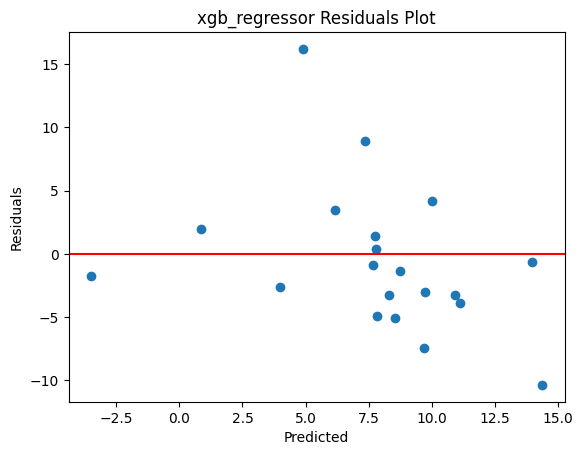

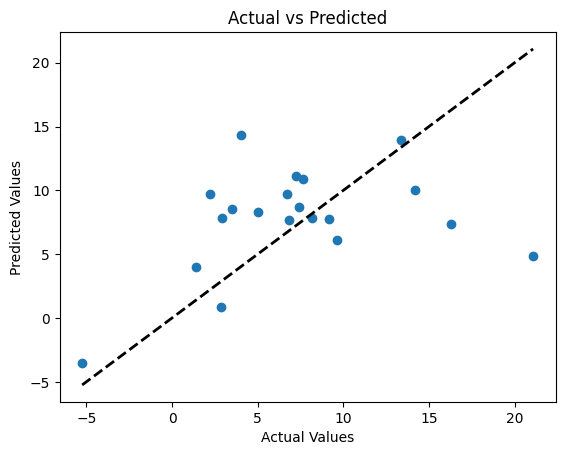

In [1]:
from prepare_data import split_patient_samples, extract_data_and_labels, preprocess_data
from select_features import forward_feature_selection_gb
from train_model import train_model
from confidence_interval import bootstrap_confidence_interval
from save_model import save_model
from mse_with_constant_prediction import calculate_baseline_mse
from utils import update_mse_with_confidence_interval, save_predictions
from sklearn.metrics import mean_squared_error
from visualize_results import residuals_plot, actual_vs_predicted_plot, loss_plot

# Model selection
model_type = 'stacked_rf_gb'  # Options: 'cnn', 'lstm', 'cnn_lstm', 'random_forest', 'gradient_boosting', 'xgb_regressor', 'stacked_rf_gb'

# Load the dataset
data_splits = split_patient_samples()

# Forward feature selection
selected_features, best_overall_config = forward_feature_selection_gb(data_splits, model_type)

# Final model training with selected features and best configuration
all_data, y, patient_ids = extract_data_and_labels(data_splits, features_to_include=selected_features)
X_train, X_test, y_train, y_test, train_ids, test_ids = preprocess_data(all_data, y, patient_ids, model_type)
final_model, history = train_model(best_overall_config, X_train, y_train)

# Plot the loss
if model_type in ['cnn', 'lstm', 'cnn_lstm']: 
    loss_plot(history, model_type)

# Save the final model
save_model(final_model, model_type)

# Eventually, load the saved model

# Generate predictions
y_pred = final_model.predict(X_test)

# Save the actual values and predictions to a CSV file
save_predictions(test_ids, y_test, y_pred, model_type)

# Calculate MSE and baseline MSE for comparison
mse = mean_squared_error(y_test, y_pred)
baseline_mse = calculate_baseline_mse(y_train, y_test)

# Bootstrap confidence interval for the MSE
mse_ci, mse_std_dev = bootstrap_confidence_interval(final_model, X_test, y_test)

# Print the baseline MSE, MSE, and MSE confidence interval
print(f"Baseline MSE (predicting mean): {baseline_mse}")
print(f'MSE: {mse}')
print(f'MSE confidence interval: {mse_ci}')
print(f'MSE Standard Deviation: {mse_std_dev}')

# Save the results to a CSV file
update_mse_with_confidence_interval(model_type, mse, mse_ci, mse_std_dev, baseline_mse)

# Visualization of the results
residuals_plot(y_test, y_pred, model_type)
actual_vs_predicted_plot(y_test, y_pred, model_type)